In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\Jessica\Downloads\consulta_cand_2020\consulta_cand_2020_BRASIL.csv'

df = pd.read_csv(filename, delimiter=';', 
                 usecols='DS_CARGO CD_CARGO DS_SITUACAO_CANDIDATURA SG_PARTIDO CD_GENERO DS_GENERO CD_COR_RACA DS_COR_RACA VR_DESPESA_MAX_CAMPANHA ST_REELEICAO SG_UF'.split(),
                 encoding='ISO-8859-1',
                 error_bad_lines=False)

In [3]:
df.shape

(557633, 11)

In [4]:
norte = ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO']
nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
centro = ['GO', 'MT', 'MS','DF']
sudeste = ['SP', 'MG', 'RJ', 'ES']
sul = ['PR', 'SC', 'RS']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557633 entries, 0 to 557632
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   SG_UF                    557633 non-null  object
 1   CD_CARGO                 557633 non-null  int64 
 2   DS_CARGO                 557633 non-null  object
 3   DS_SITUACAO_CANDIDATURA  557633 non-null  object
 4   SG_PARTIDO               557633 non-null  object
 5   CD_GENERO                557633 non-null  int64 
 6   DS_GENERO                557633 non-null  object
 7   CD_COR_RACA              557633 non-null  int64 
 8   DS_COR_RACA              557633 non-null  object
 9   VR_DESPESA_MAX_CAMPANHA  557633 non-null  int64 
 10  ST_REELEICAO             557633 non-null  object
dtypes: int64(4), object(7)
memory usage: 46.8+ MB


In [6]:
df.sample(10)

,SG_UF,CD_CARGO,DS_CARGO,DS_SITUACAO_CANDIDATURA,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO
153355,MS,13,VEREADOR,APTO,PSDB,2,MASCULINO,1,BRANCA,12308,N
60424,PB,13,VEREADOR,APTO,AVANTE,2,MASCULINO,1,BRANCA,12308,N
35291,SC,13,VEREADOR,APTO,PL,2,MASCULINO,1,BRANCA,12308,N
510997,MG,13,VEREADOR,APTO,PSDB,2,MASCULINO,1,BRANCA,12308,N
54149,RJ,13,VEREADOR,APTO,PSDB,2,MASCULINO,1,BRANCA,294899,N
437699,RO,13,VEREADOR,APTO,PP,2,MASCULINO,3,PARDA,24808,N
264960,RS,13,VEREADOR,APTO,SOLIDARIEDADE,2,MASCULINO,1,BRANCA,157264,N
5278,SP,13,VEREADOR,APTO,MDB,2,MASCULINO,1,BRANCA,12308,N
376446,MA,13,VEREADOR,APTO,PMB,4,FEMININO,2,PRETA,12308,N
65898,BA,13,VEREADOR,APTO,PL,2,MASCULINO,6,SEM INFORMAÇÃO,12308,N


De acordo com os dados da matéria da BBC [Direita ou esquerda? Análise de votações indica posição de partidos brasileiros no espectro ideológico](https://www.bbc.com/portuguese/brasil-41058120) de 2017, será a base nessa análise os partidos definidos de cada posição.

In [7]:
partidos_esquerda = ['PDT', 'PTDOB', 'PCDOB', 'PT', 'PROS', 'PSB', 'REDE', 'PSOL']
partidos_direita = ['PSL', 'PRP', 'PR', 'PRB', 'PMDB', 'PTB', 'PP', 'DEM', 'SD', 'PSD', 'PHS', 'PODE', 'PSC', 'PSDB', 'PEN', 'PPS', 'PV']

In [8]:
def raca_esquerda_direita(regiao, name_of_regiao):
    direita = df.query('SG_PARTIDO in @partidos_direita and SG_UF in @regiao and DS_SITUACAO_CANDIDATURA == "APTO" and ST_REELEICAO == "N"').groupby('DS_COR_RACA').size().sort_values()
    esquerda = df.query('SG_PARTIDO in @partidos_esquerda and SG_UF in @regiao and DS_SITUACAO_CANDIDATURA == "APTO" and ST_REELEICAO == "N"').groupby('DS_COR_RACA').size().sort_values()
    n_direita = dict(direita)
    n_esquerda = dict(esquerda)
    total = sum(n_direita.values())
    for key in n_direita.keys():
        n_direita[key] = round((n_direita[key]/total)*100, 2)
    
    total = sum(n_esquerda.values())
    for key in n_esquerda.keys():
        n_esquerda[key] = round((n_esquerda[key]/total)*100, 2)
    
    racas = list(n_direita)
    racas = list(n_direita.keys())
    dados_grafico = {'racas': racas, 'direita': [], 'esquerda': []}
    for raca in racas:
            dados_grafico['direita'].append(n_direita[raca])
            dados_grafico['esquerda'].append(n_esquerda[raca])

    labels = dados_grafico['racas']
    direita = dados_grafico['direita']
    esquerda = dados_grafico['esquerda']

    x = np.arange(len(labels)) 
    width = 0.35

    fig, ax = plt.subplots(1,1,figsize=(12,7))
    rects1 = ax.bar(x + width/1.90, esquerda, width, label='Esquerda', color='#B22222')
    rects2 = ax.bar(x - width/1.90, direita, width, label='Direita', color = '#000080')

    plt.xlabel('Raças',color ='#2C79A0', fontsize=14, ha='center')
    plt.figtext(.065,.87,'Percentual de candidatos',color ='k', fontsize=11, ha='center')
    ax.set_title(f'Candidatos por raça de partidos de direita e esquerda na região {name_of_regiao}', fontsize=20,color ='#2C79A0')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.legend(loc=2,prop={'size':13})
    plt.style.use("bmh")
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')




    autolabel(rects1)
    autolabel(rects2)
    plt.show()

Agora serão demonstrados em percentual os candidados por raça entre direita e esquerda em cada região do Brasil.

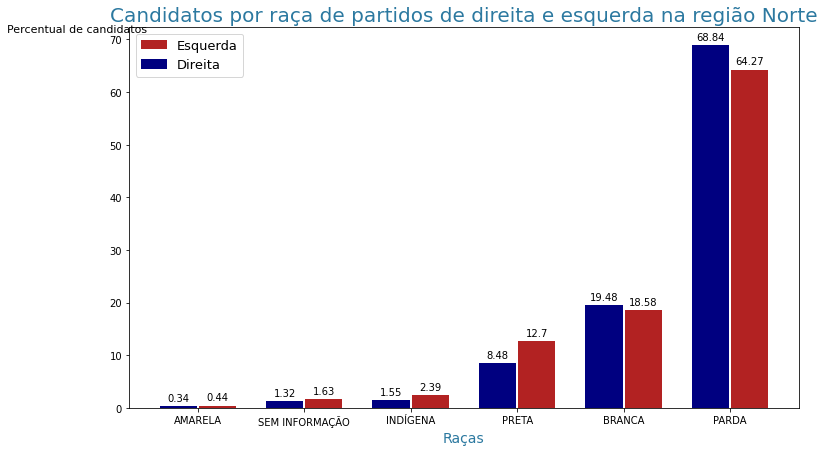

In [9]:
raca_esquerda_direita(norte, 'Norte')

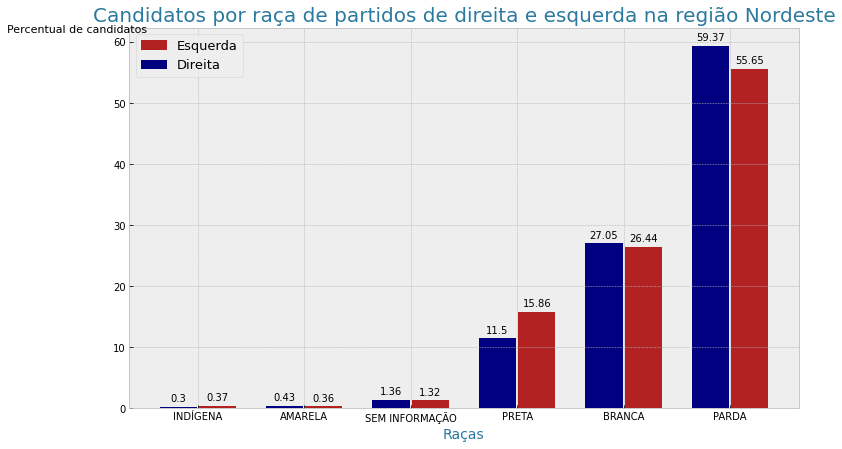

In [10]:
raca_esquerda_direita(nordeste, 'Nordeste')

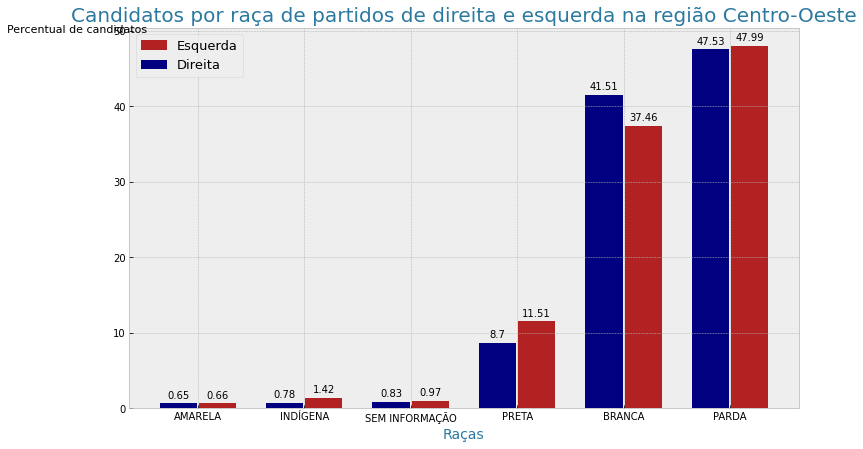

In [11]:
raca_esquerda_direita(centro, 'Centro-Oeste')

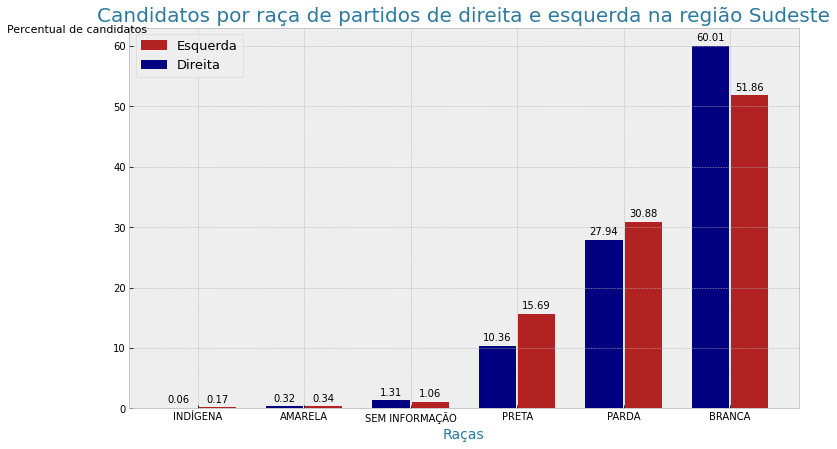

In [12]:
raca_esquerda_direita(sudeste, 'Sudeste')

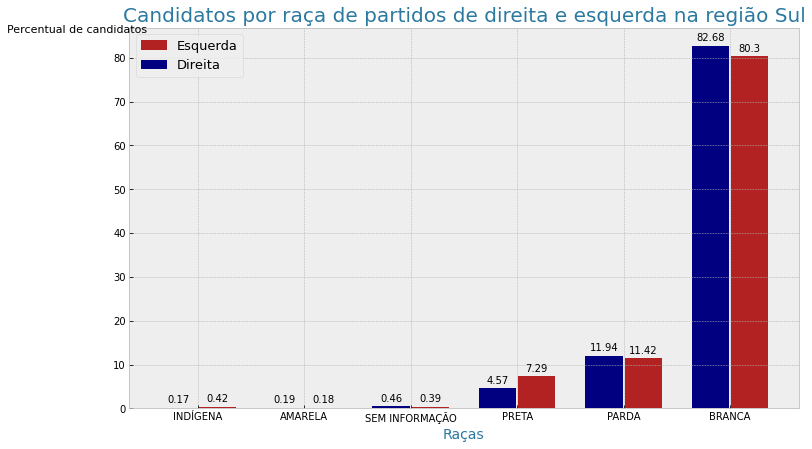

In [13]:
raca_esquerda_direita(sul, 'Sul')

Agora serão demonstrados os gêneros dos candidatos por partidos de esquerda e direita por regiões do Brasil

In [14]:
def genero_direita_esquerda(regiao, nome_regiao):
    direita = df.query('DS_SITUACAO_CANDIDATURA == "APTO" and SG_UF in @norte and SG_PARTIDO in @partidos_direita and ST_REELEICAO == "N"').groupby('DS_GENERO').size().sort_values()
    esquerda = df.query('DS_SITUACAO_CANDIDATURA == "APTO" and SG_UF in @norte and SG_PARTIDO in @partidos_esquerda and ST_REELEICAO == "N"').groupby('DS_GENERO').size().sort_values()
    n_direita = dict(direita)
    n_esquerda = dict(esquerda)
    
    total = sum(n_direita.values())
    for key in n_direita.keys():
        n_direita[key] = round((n_direita[key]/total)*100, 2)
    
    total = sum(n_esquerda.values())
    for key in n_esquerda.keys():
        n_esquerda[key] = round((n_esquerda[key]/total)*100, 2)
        
    
    dados_grafico = {'direita': n_direita.values(), 'esquerda': n_esquerda.values()}
    generos = ['FEMININO', 'MASCULINO']
    plotdata = pd.DataFrame(data=dados_grafico, index=generos)
    plotdata.plot.bar(stacked=True,rot=15, title=f'Gêneros por partidos de esquerda e direita na região {nome_regiao}');

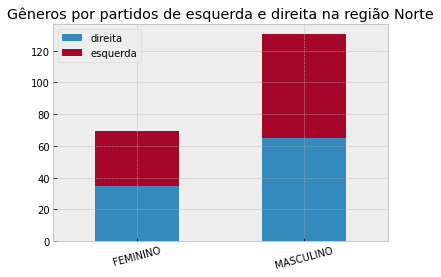

In [15]:
genero_direita_esquerda(norte, 'Norte')

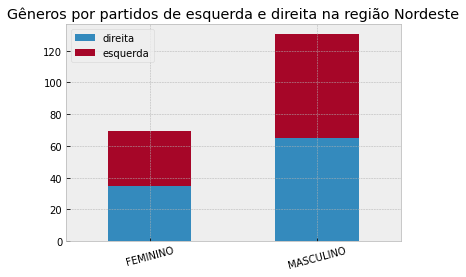

In [16]:
genero_direita_esquerda(nordeste, 'Nordeste')

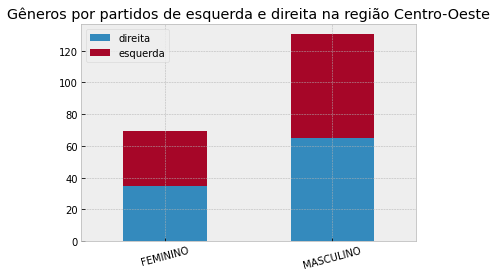

In [17]:
genero_direita_esquerda(centro, 'Centro-Oeste')

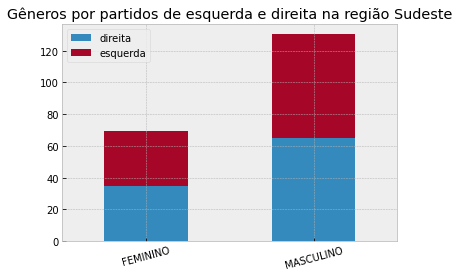

In [18]:
genero_direita_esquerda(sudeste, 'Sudeste')

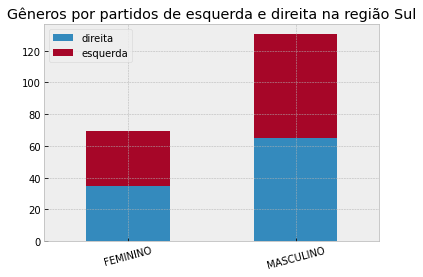

In [19]:
genero_direita_esquerda(sul, 'Sul')